In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
file_path = '/content/drive/MyDrive/DSA2025Spring/Final_Sleep_Analysis.xlsx'
df = pd.read_excel(file_path)
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        67 non-null     datetime64[ns]
 1   Exercise(Fitness) (min)     67 non-null     int64         
 2   Exercise(walking) (steps)   67 non-null     int64         
 3   calories burned             67 non-null     int64         
 4   Carbohydrates (g)           67 non-null     int64         
 5   Sugar (g)                   67 non-null     int64         
 6   Protein (g)                 67 non-null     int64         
 7   Total Calories              67 non-null     int64         
 8   Caffeine (mg)               67 non-null     int64         
 9   Computer Usage (min)        67 non-null     int64         
 10  Phone Usage (min)           67 non-null     int64         
 11  Total Sleep Duration (min)  67 non-null     int64         
 

,0
Date,0
Exercise(Fitness) (min),0
Exercise(walking) (steps),0
calories burned,0
Carbohydrates (g),0
Sugar (g),0
Protein (g),0
Total Calories,0
Caffeine (mg),0
Computer Usage (min),0


In [3]:
df["Date"] = pd.to_datetime(df["Date"])

NameError: name 'pd' is not defined

In [ ]:
df.head()
df.info()
df.isnull().sum()

In [ ]:
df.describe()

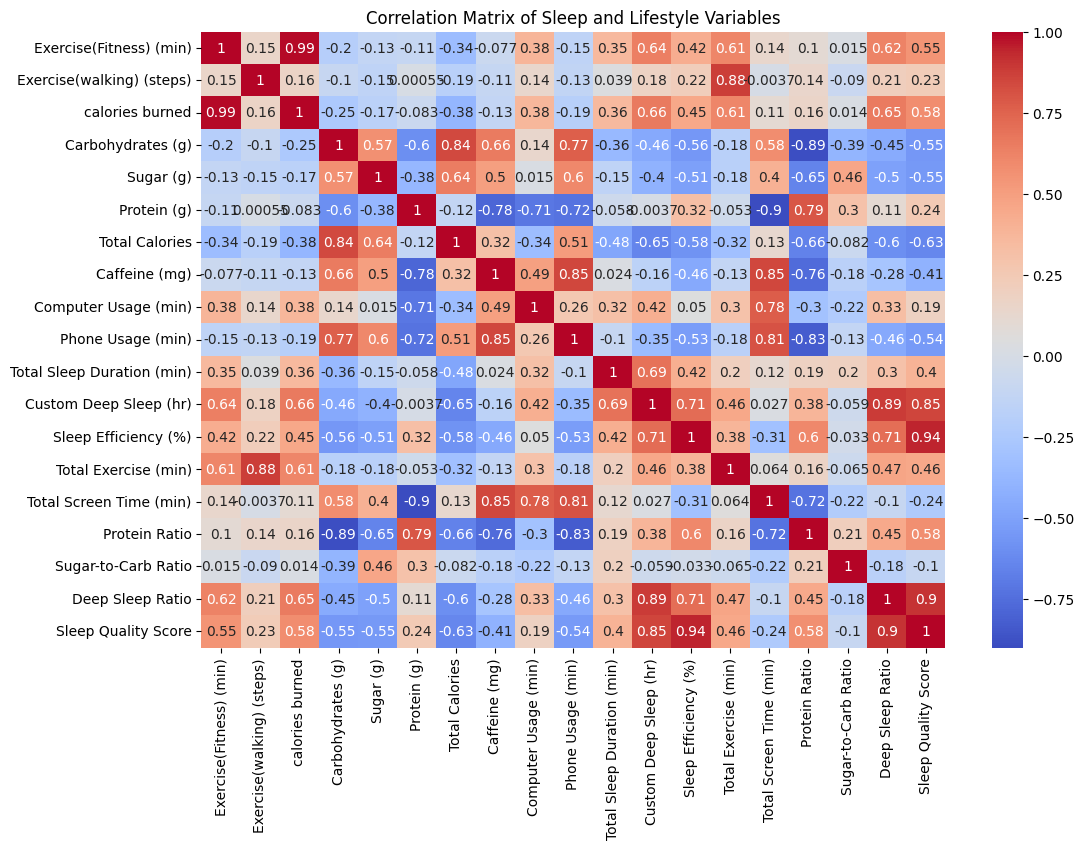

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Sleep and Lifestyle Variables")
plt.show()

In [ ]:
selected_vars = [
    "Exercise(Fitness) (min)",
    "Exercise(walking) (steps)",
    "Caffeine (mg)",
    "Phone Usage (min)",
    "Computer Usage (min)",
    "Total Calories",
    "Carbohydrates (g)",
    "Sugar (g)"
]

# Korelasyonları sleep score ve deep sleep ile göster
for var in selected_vars:
    r1 = df["Sleep Efficiency (%)"].corr(df[var])
    r2 = df["Custom Deep Sleep (hr)"].corr(df[var])
    print(f"{var} -> Sleep Score Corr: {r1:.2f}, Deep Sleep Corr: {r2:.2f}")

Exercise(Fitness) (min) -> Sleep Score Corr: 0.54, Deep Sleep Corr: 0.73
Exercise(walking) (steps) -> Sleep Score Corr: 0.27, Deep Sleep Corr: 0.16
Caffeine (mg) -> Sleep Score Corr: -0.68, Deep Sleep Corr: -0.51
Phone Usage (min) -> Sleep Score Corr: -0.70, Deep Sleep Corr: -0.65
Computer Usage (min) -> Sleep Score Corr: 0.24, Deep Sleep Corr: 0.48
Total Calories -> Sleep Score Corr: -0.66, Deep Sleep Corr: -0.70
Carbohydrates (g) -> Sleep Score Corr: -0.68, Deep Sleep Corr: -0.71
Sugar (g) -> Sleep Score Corr: -0.61, Deep Sleep Corr: -0.48


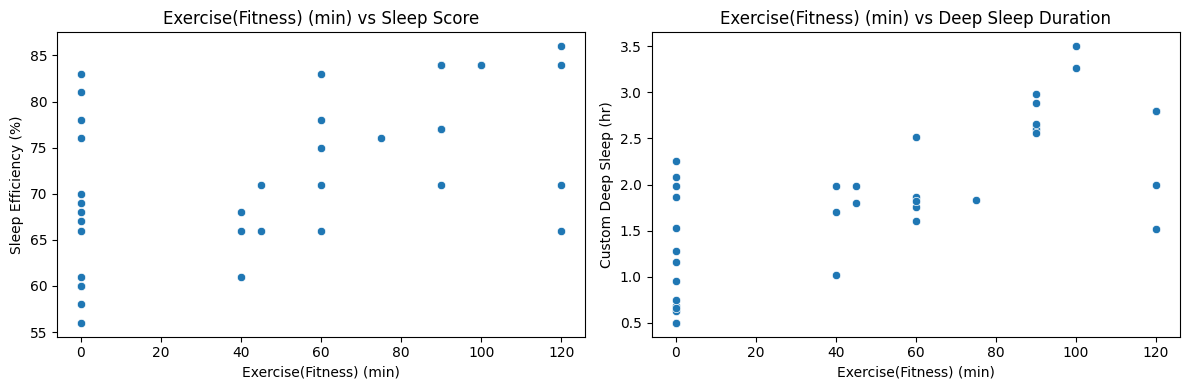

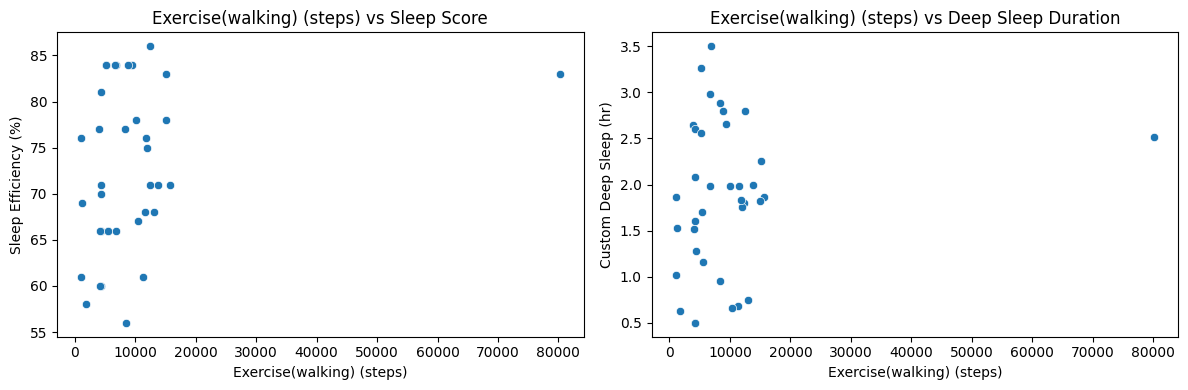

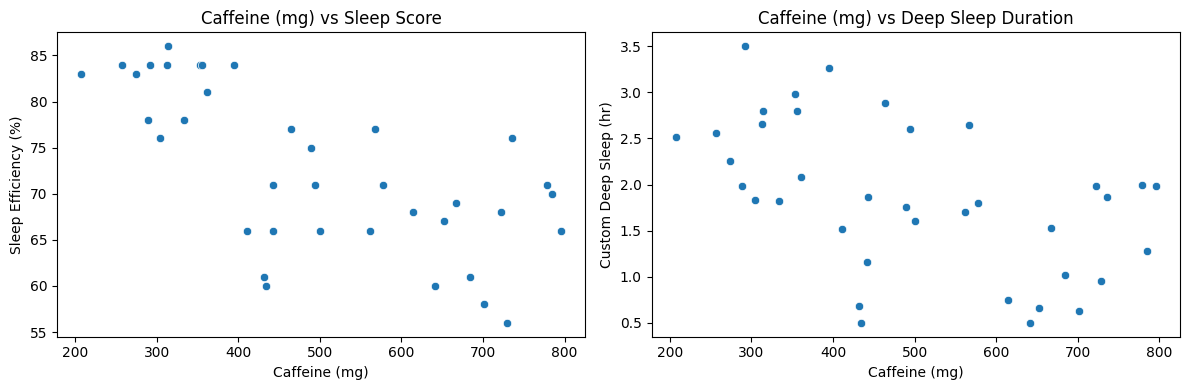

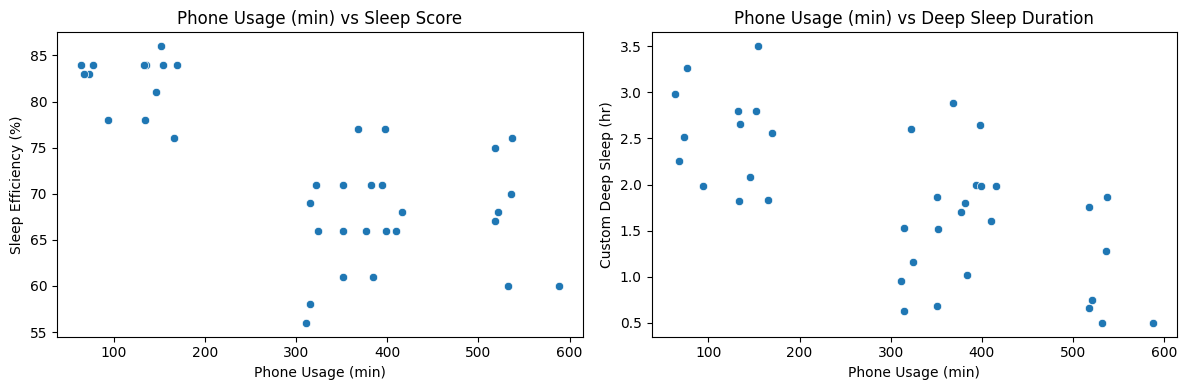

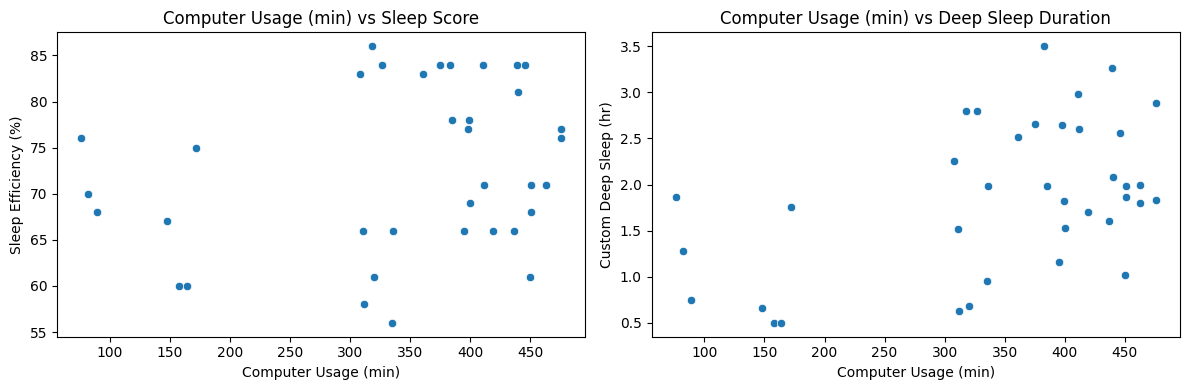

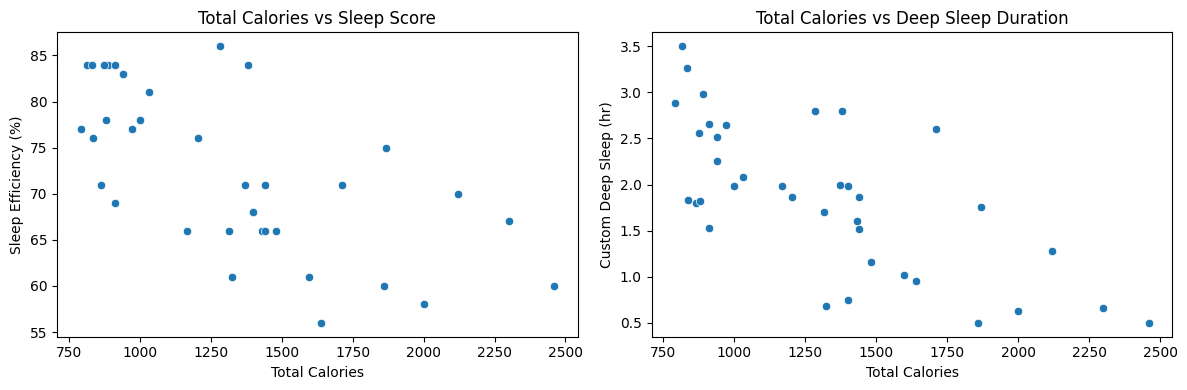

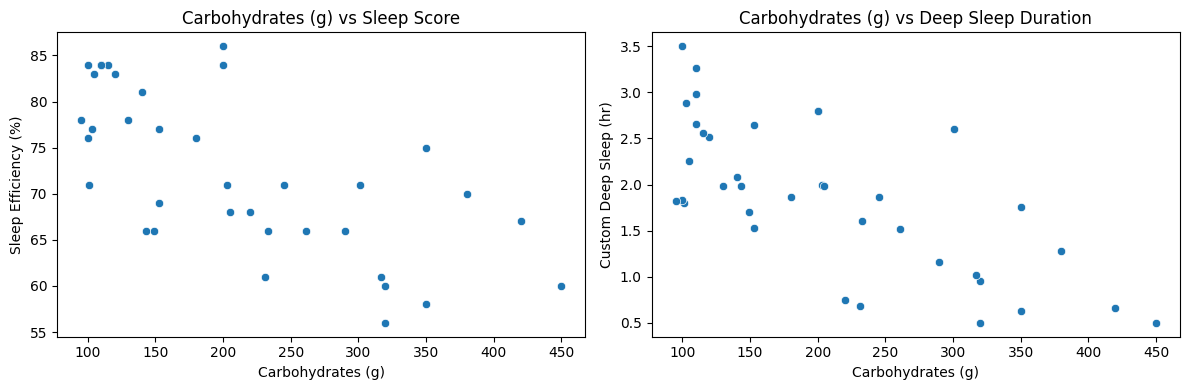

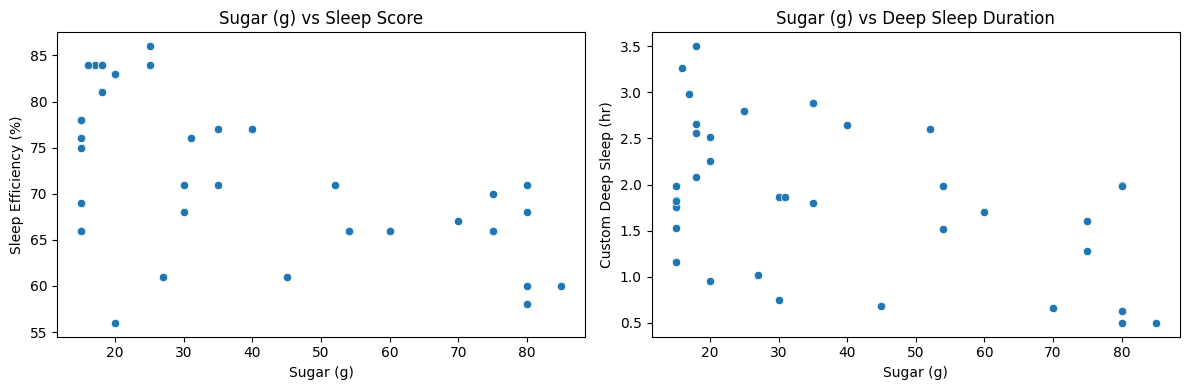

In [ ]:
for var in selected_vars:
    plt.figure(figsize=(12, 4))

    # Sleep Score vs Variable
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x=var, y="Sleep Efficiency (%)")
    plt.title(f"{var} vs Sleep Score")

    # Deep Sleep vs Variable
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x=var, y="Custom Deep Sleep (hr)")
    plt.title(f"{var} vs Deep Sleep Duration")

    plt.tight_layout()
    plt.show()

In [ ]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

<ipython-input-82-e40da22b8040>:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


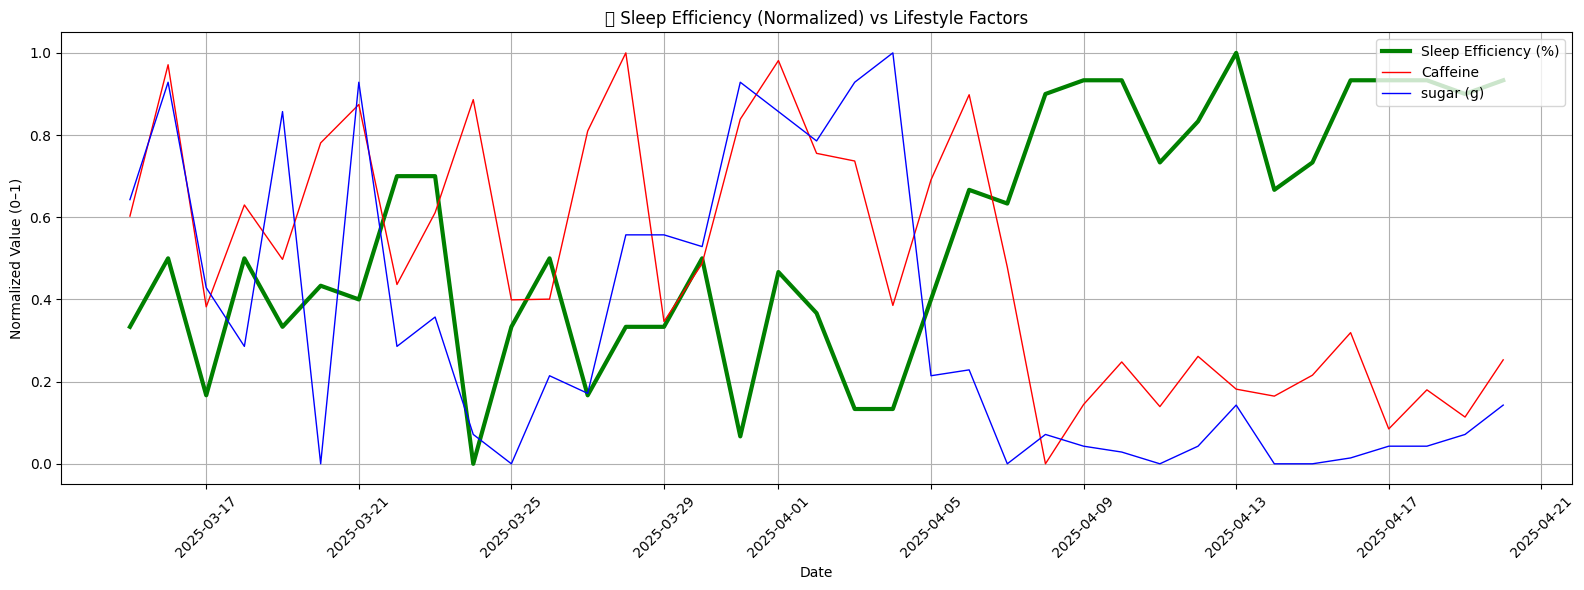

In [ ]:
plt.figure(figsize=(16, 6))

# Sleep Score: kalın çizgi
plt.plot(df["Date"], normalize(df["Sleep Efficiency (%)"]), label="Sleep Efficiency (%)", color="green", linewidth=3)

# Diğer değişkenler: normalize edilmiş ve şeffaf

plt.plot(df["Date"], normalize(df["Caffeine (mg)"]), label="Caffeine", color="red",linewidth=1)
plt.plot(df["Date"], normalize(df["Sugar (g)"]), label="sugar (g)", color="blue",linewidth=1)


plt.title("📈 Sleep Efficiency (Normalized) vs Lifestyle Factors")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-83-6ee95bf86a74>:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


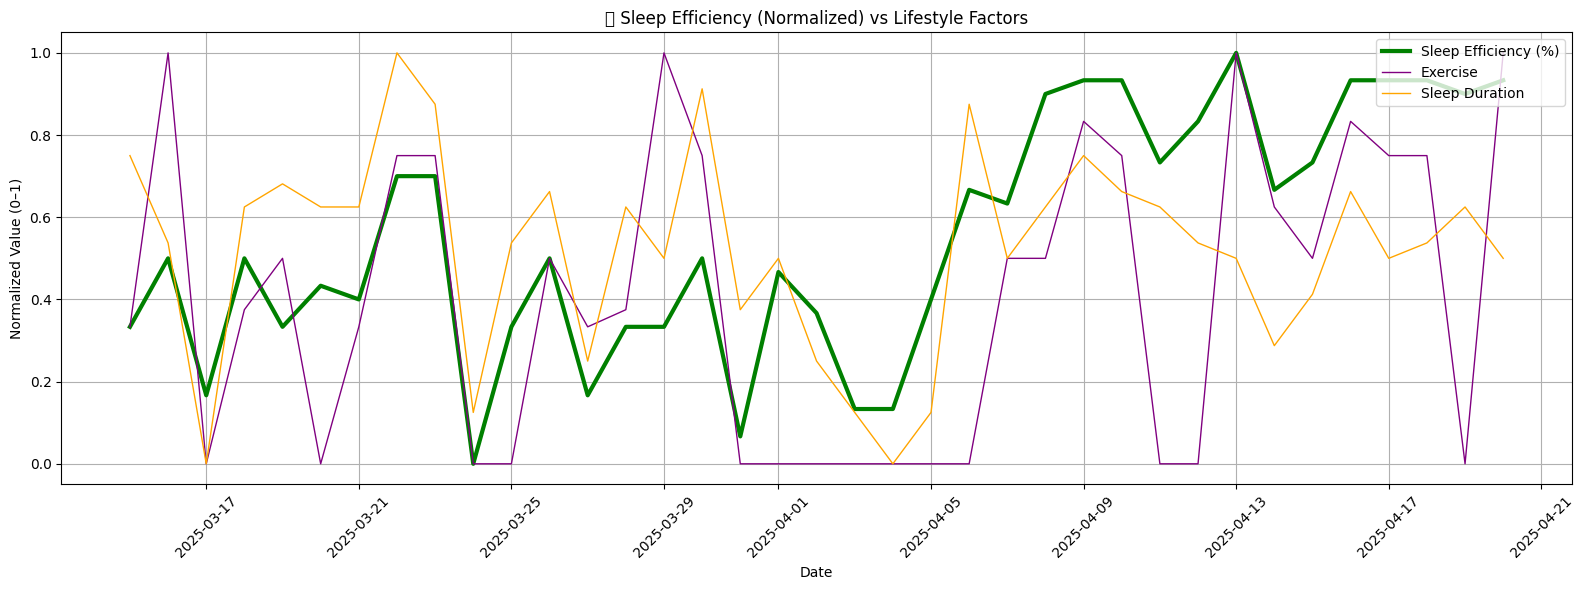

In [ ]:
plt.figure(figsize=(16, 6))

# Sleep Score: kalın çizgi
plt.plot(df["Date"], normalize(df["Sleep Efficiency (%)"]), label="Sleep Efficiency (%)", color="green", linewidth=3)

# Diğer değişkenler: normalize edilmiş ve şeffaf
plt.plot(df["Date"], normalize(df["Exercise(Fitness) (min)"]), label="Exercise", color="purple", linewidth=1)

plt.plot(df["Date"], normalize(df["Total Sleep Duration (min)"]), label="Sleep Duration", color="orange", linewidth=1)

plt.title("📈 Sleep Efficiency (Normalized) vs Lifestyle Factors")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-81-5a4d8a29f40e>:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


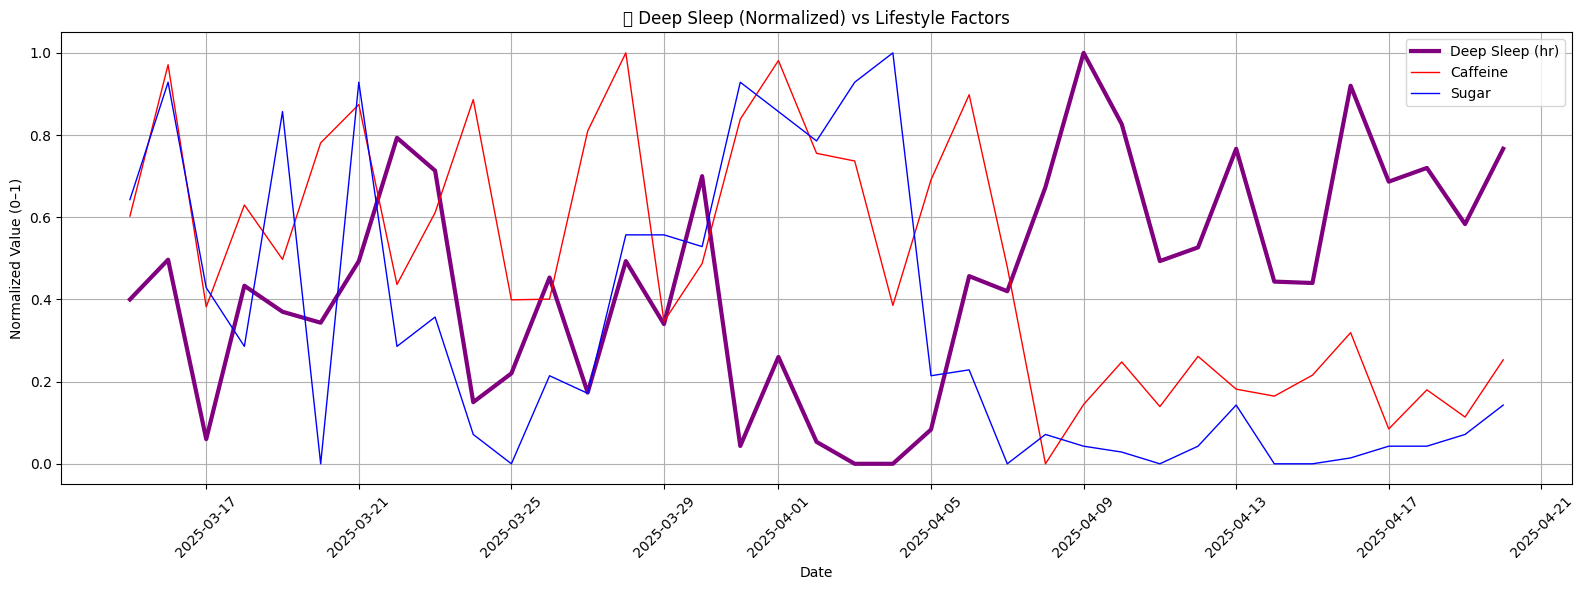

In [ ]:
plt.figure(figsize=(16, 6))

# Deep Sleep: kalın çizgi
plt.plot(df["Date"], normalize(df["Custom Deep Sleep (hr)"]), label="Deep Sleep (hr)", color="purple", linewidth=3)

# Diğerleri: normalize ve daha hafif

plt.plot(df["Date"], normalize(df["Caffeine (mg)"]), label="Caffeine", color="red",linewidth=1)
plt.plot(df["Date"], normalize(df["Sugar (g)"]), label="Sugar", color="blue",linewidth=1 )


plt.title("📈 Deep Sleep (Normalized) vs Lifestyle Factors")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-80-d2673f887a9c>:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


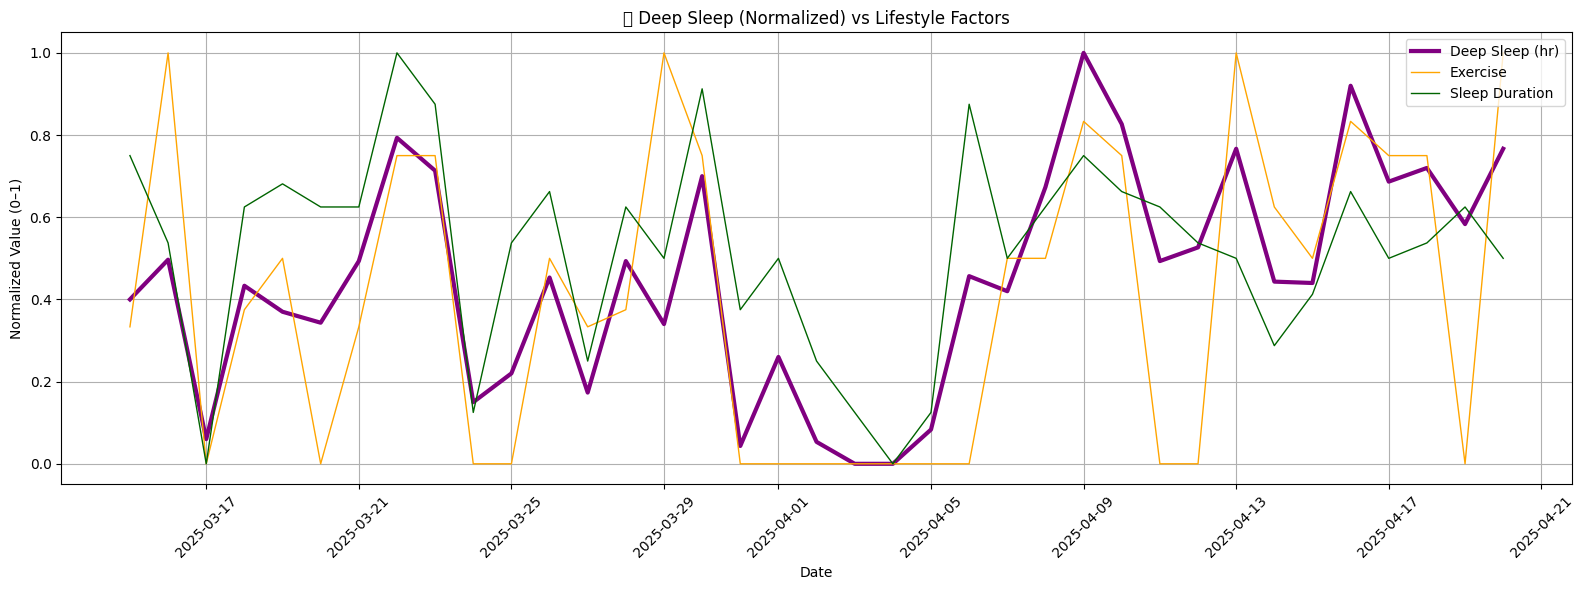

In [ ]:
plt.figure(figsize=(16, 6))

# Deep Sleep: kalın çizgi
plt.plot(df["Date"], normalize(df["Custom Deep Sleep (hr)"]), label="Deep Sleep (hr)", color="purple", linewidth=3)

# Diğerleri: normalize ve daha hafif
plt.plot(df["Date"], normalize(df["Exercise(Fitness) (min)"]), label="Exercise", color="orange", linewidth=1)
plt.plot(df["Date"], normalize(df["Total Sleep Duration (min)"]), label="Sleep Duration", color="darkgreen", linewidth=1)

plt.title("📈 Deep Sleep (Normalized) vs Lifestyle Factors")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr

r, p = pearsonr(df["Caffeine (mg)"], df["Total Sleep Duration (min)"])
print(f"H1 - Caffeine vs Sleep Duration → r: {r:.2f}, p-value: {p_val:.8f}")

if p < 0.05:
    print("✅ Statistically significant (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H1 - Caffeine vs Sleep Duration → r: -0.10, p-value: 0.00003107
❌ Not significant (fail to reject H₀)


In [ ]:
from scipy.stats import ttest_ind

active = df[df["Exercise(Fitness) (min)"] > 0]["Custom Deep Sleep (hr)"]
inactive = df[df["Exercise(Fitness) (min)"] == 0]["Custom Deep Sleep (hr)"]

t_stat, p_val = ttest_ind(active, inactive, equal_var=False)
print(f"H2 - Exercise vs Deep Sleep → t-statistic: {t_stat:.2f}, p-value: {p_val:.8f}")

if p_val < 0.05:
    print("✅ Statistically significant difference (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H2 - Exercise vs Deep Sleep → t-statistic: 4.98, p-value: 0.00003107
✅ Statistically significant difference (reject H₀)


In [ ]:
r, p = pearsonr(df["Phone Usage (min)"], df["Sleep Efficiency (%)"])
print(f"H4 - Phone Usage vs Sleep Efficiency → r: {r:.2f}, p-value: {p_val:.8f}")

if p < 0.05:
    print("✅ Statistically significant (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H4 - Phone Usage vs Sleep Efficiency → r: -0.70, p-value: 0.00003107
✅ Statistically significant (reject H₀)


In [ ]:
r, p = pearsonr(df["Sugar (g)"], df["Sleep Efficiency (%)"])
print(f"H7 - Sugar vs Sleep Efficiency → r: {r:.2f}, p-value: {p_val:.8f}")

if p < 0.05:
    print("✅ Statistically significant (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H7 - Sugar vs Sleep Efficiency → r: -0.61, p-value: 0.00003107
✅ Statistically significant (reject H₀)


In [ ]:
high_caffeine = df[df["Caffeine (mg)"] > 400]["Sleep Efficiency (%)"]
low_caffeine = df[df["Caffeine (mg)"] <= 400]["Sleep Efficiency (%)"]

t_stat, p_val = ttest_ind(high_caffeine, low_caffeine, equal_var=False)
print(f"H9 - High vs Low Caffeine Sleep Efficiency → t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H9 - High vs Low Caffeine Sleep Efficiency → t-statistic: -10.13, p-value: 0.0000
✅ Statistically significant difference (reject H₀)


In [ ]:
# Eğer Sleep Hour sütunun yoksa önce oluşturalım:
df["Sleep Hour"] = df["Sleep Onset Time"].astype(str).str.split(":").str[0].astype(int)

# Early = Saat 22, 23, 0 olanlar
early = df[df["Sleep Hour"].isin([22, 23, 0])]["Sleep Efficiency (%)"]

# Late = Saat 1, 2, 3, 4, 5 olanlar
late = df[df["Sleep Hour"].isin([1, 2, 3, 4, 5])]["Sleep Efficiency (%)"]

In [ ]:

t_stat, p_val = ttest_ind(early, late, equal_var=False)
print(f"H3 (Updated) - Early vs Late Sleepers (Efficiency) → t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H3 (Updated) - Early vs Late Sleepers (Efficiency) → t-statistic: 6.78, p-value: 0.0000
✅ Statistically significant difference (reject H₀)


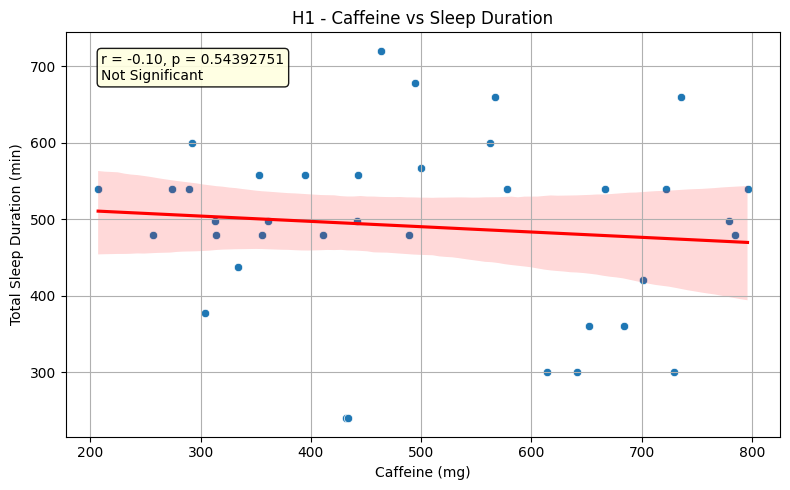

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Caffeine (mg)", y="Total Sleep Duration (min)")
sns.regplot(data=df, x="Caffeine (mg)", y="Total Sleep Duration (min)", scatter=False, color="red")
plt.title("H1 - Caffeine vs Sleep Duration")
r, p = pearsonr(df["Caffeine (mg)"], df["Total Sleep Duration (min)"])
result_text = f"r = {r:.2f}, p = {p:.8f}\n" + ("Significant" if p < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

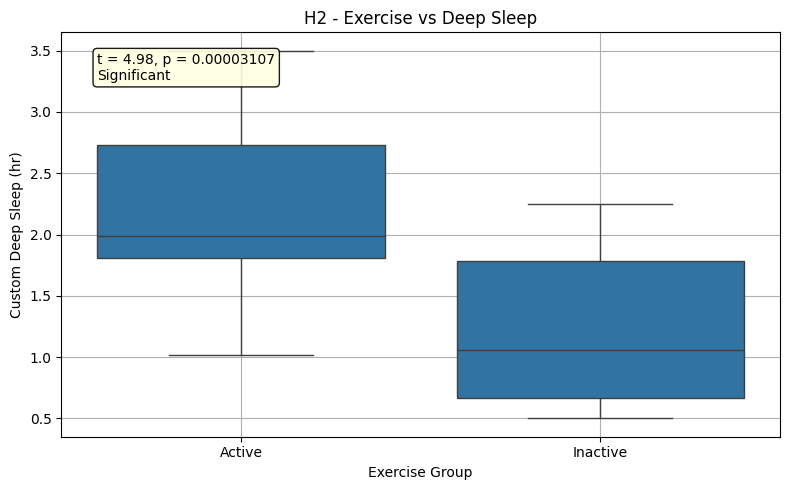

In [ ]:
df["Exercise Group"] = df["Exercise(Fitness) (min)"].apply(lambda x: "Active" if x > 0 else "Inactive")
plt.figure(figsize=(8,5))
sns.boxplot(x="Exercise Group", y="Custom Deep Sleep (hr)", data=df)
plt.title("H2 - Exercise vs Deep Sleep")
active = df[df["Exercise Group"] == "Active"]["Custom Deep Sleep (hr)"]
inactive = df[df["Exercise Group"] == "Inactive"]["Custom Deep Sleep (hr)"]
t_stat, p_val = ttest_ind(active, inactive, equal_var=False)
result_text = f"t = {t_stat:.2f}, p = {p_val:.8f}\n" + ("Significant" if p_val < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

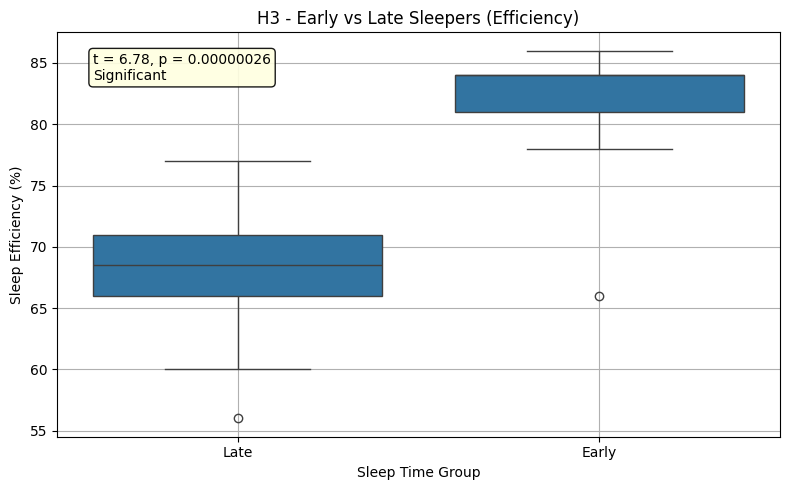

In [ ]:
df["Sleep Hour"] = df["Sleep Onset Time"].astype(str).str.split(":").str[0].astype(int)
df["Sleep Time Group"] = df["Sleep Hour"].apply(lambda x: "Early" if x in [22,23,0] else ("Late" if x in [1,2,3,4,5] else None))
plt.figure(figsize=(8,5))
sns.boxplot(x="Sleep Time Group", y="Sleep Efficiency (%)", data=df[df["Sleep Time Group"].notna()])
plt.title("H3 - Early vs Late Sleepers (Efficiency)")
early = df[df["Sleep Time Group"] == "Early"]["Sleep Efficiency (%)"]
late = df[df["Sleep Time Group"] == "Late"]["Sleep Efficiency (%)"]
t_stat, p_val = ttest_ind(early, late, equal_var=False)
result_text = f"t = {t_stat:.2f}, p = {p_val:.8f}\n" + ("Significant" if p_val < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

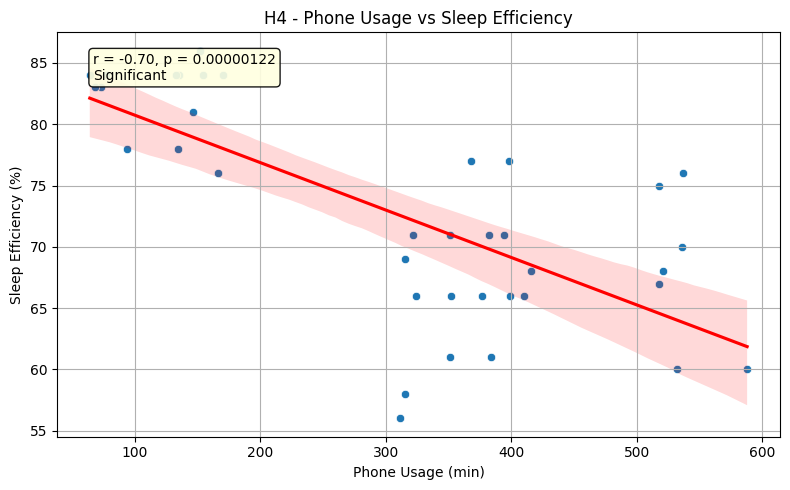

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Phone Usage (min)", y="Sleep Efficiency (%)")
sns.regplot(data=df, x="Phone Usage (min)", y="Sleep Efficiency (%)", scatter=False, color="red")
plt.title("H4 - Phone Usage vs Sleep Efficiency")
r, p = pearsonr(df["Phone Usage (min)"], df["Sleep Efficiency (%)"])
result_text = f"r = {r:.2f}, p = {p:.8f}\n" + ("Significant" if p < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

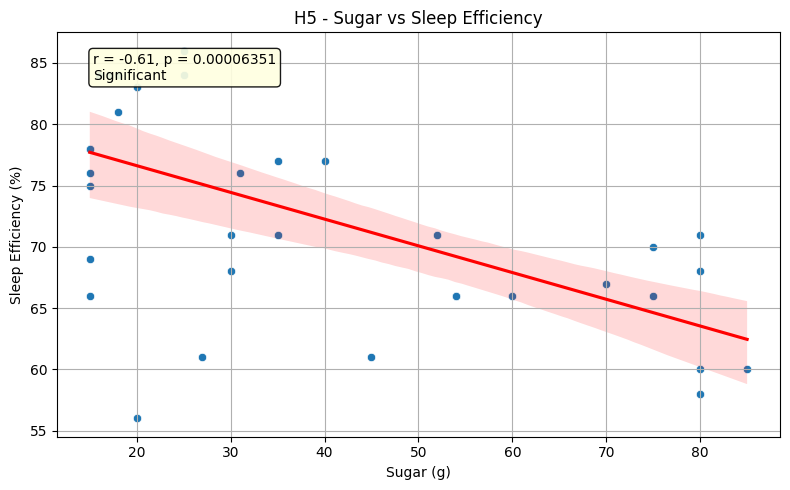

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Sugar (g)", y="Sleep Efficiency (%)")
sns.regplot(data=df, x="Sugar (g)", y="Sleep Efficiency (%)", scatter=False, color="red")
plt.title("H5 - Sugar vs Sleep Efficiency")
r, p = pearsonr(df["Sugar (g)"], df["Sleep Efficiency (%)"])
result_text = f"r = {r:.2f}, p = {p:.8f}\n" + ("Significant" if p < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

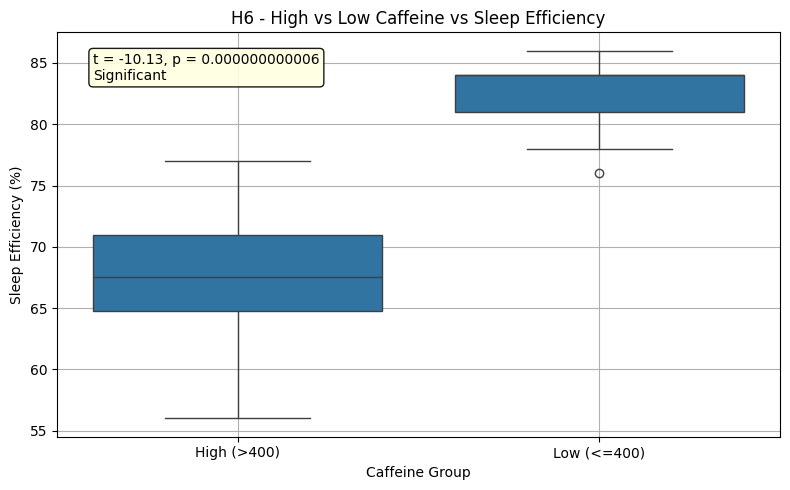

In [ ]:
df["Caffeine Group"] = df["Caffeine (mg)"].apply(lambda x: "High (>400)" if x > 400 else "Low (<=400)")
plt.figure(figsize=(8,5))
sns.boxplot(x="Caffeine Group", y="Sleep Efficiency (%)", data=df)
plt.title("H6 - High vs Low Caffeine vs Sleep Efficiency")
high_caffeine = df[df["Caffeine Group"] == "High (>400)"]["Sleep Efficiency (%)"]
low_caffeine = df[df["Caffeine Group"] == "Low (<=400)"]["Sleep Efficiency (%)"]
t_stat, p_val = ttest_ind(high_caffeine, low_caffeine, equal_var=False)
result_text = f"t = {t_stat:.2f}, p = {p_val:.12f}\n" + ("Significant" if p_val < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# 1. Gerekli kütüphaneleri yükle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Excel dosyasını Google Drive'dan oku (önceden yüklemiş olmalısın)
file_path = '/content/drive/MyDrive/DSA2025Spring/Final_Sleep_Analysis.xlsx'
df = pd.read_excel(file_path)

# 3. Göz at
print("Veri boyutu:", df.shape)
df.head()


Veri boyutu: (67, 21)


,Date,Exercise(Fitness) (min),Exercise(walking) (steps),calories burned,Carbohydrates (g),Sugar (g),Protein (g),Total Calories,Caffeine (mg),Computer Usage (min),...,Total Sleep Duration (min),Sleep Onset Time,Custom Deep Sleep (hr),Sleep Efficiency (%),Total Exercise (min),Total Screen Time (min),Protein Ratio,Sugar-to-Carb Ratio,Deep Sleep Ratio,Sleep Quality Score
0,2025-03-15,50,5445,404,149,60,120,1316,562,419,...,600,02:00:00,1.70,66,91.884615,796,0.091185,0.402685,0.170000,83.000000
1,2025-03-16,130,13759,1005,203,80,60,1372,779,463,...,498,03:00:00,1.99,71,235.838462,857,0.043732,0.394089,0.239759,94.975904
2,2025-03-17,0,11283,0,231,45,55,1324,432,320,...,240,02:30:00,0.68,61,86.792308,671,0.041541,0.194805,0.170000,78.000000
3,2025-03-18,55,12386,439,101,35,80,864,578,463,...,540,03:00:00,1.80,71,150.276923,845,0.092593,0.346535,0.200000,91.000000
4,2025-03-19,70,4299,644,233,75,50,1432,500,437,...,567,02:20:00,1.61,66,103.069231,847,0.034916,0.321888,0.170370,83.037037


In [12]:
# 4. Hedef değişken ve özellikleri ayır (Sleep Quality Score'u tahmin edeceğiz)
exclude_cols = ['Date', 'Sleep Onset Time', 'Sleep Quality Score']
X = df.drop(columns=exclude_cols)
y = df['Sleep Quality Score']

# 5. Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. İki farklı model eğit: Linear Regression & Random Forest
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [13]:
# 7. Performans karşılaştırması
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)

print("📈 Linear Regression:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("R²:", r2_score(y_test, lr_preds))

print("\n🌲 Random Forest:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("R²:", r2_score(y_test, rf_preds))


📈 Linear Regression:
MAE: 7.663710935698224e-13
R²: 1.0

🌲 Random Forest:
MAE: 2.7435765532402314
R²: 0.9414728676078875


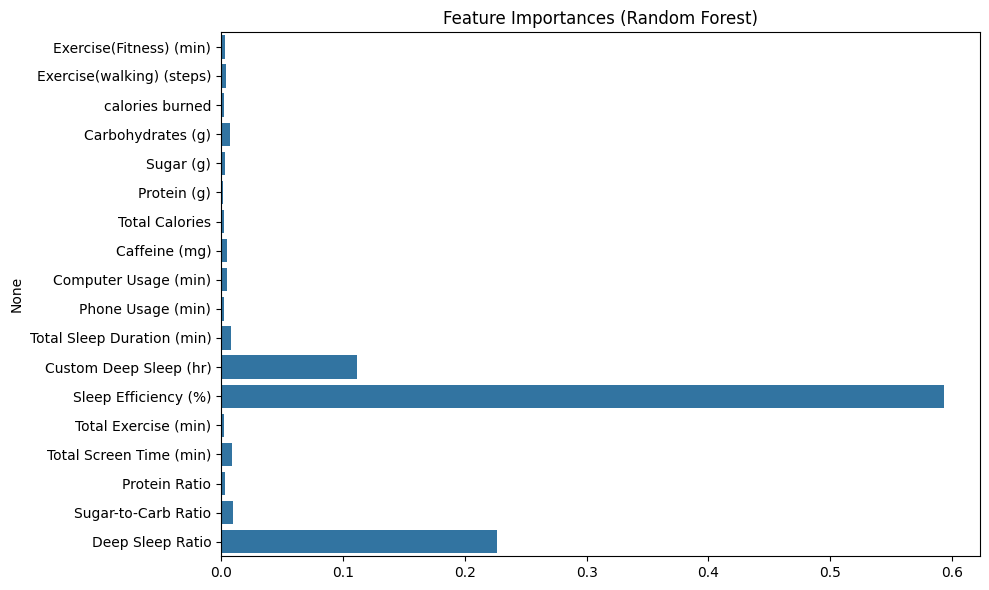

In [14]:
# 8. Özellik önem düzeyi (Random Forest için)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


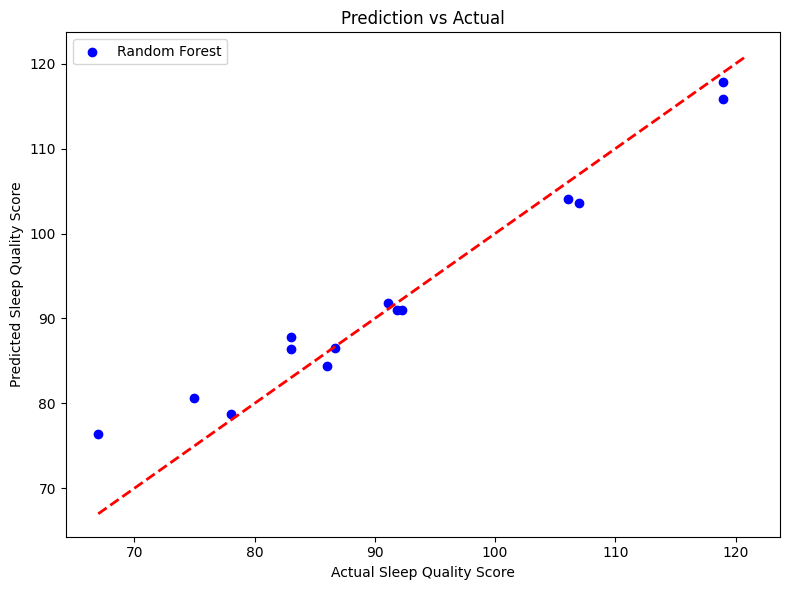

In [15]:
# 9. Tahmin vs Gerçek grafik karşılaştırması
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_preds, color='blue', label="Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Sleep Quality Score")
plt.ylabel("Predicted Sleep Quality Score")
plt.title("Prediction vs Actual")
plt.legend()
plt.tight_layout()
plt.show()


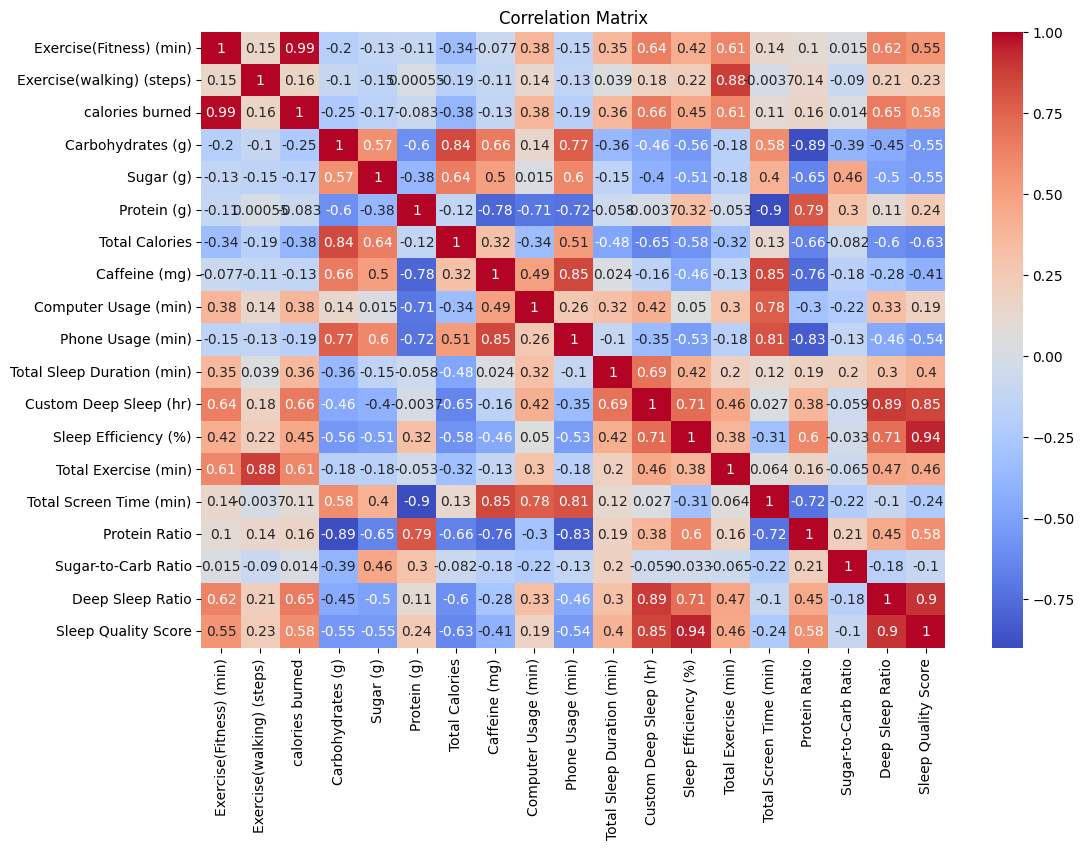

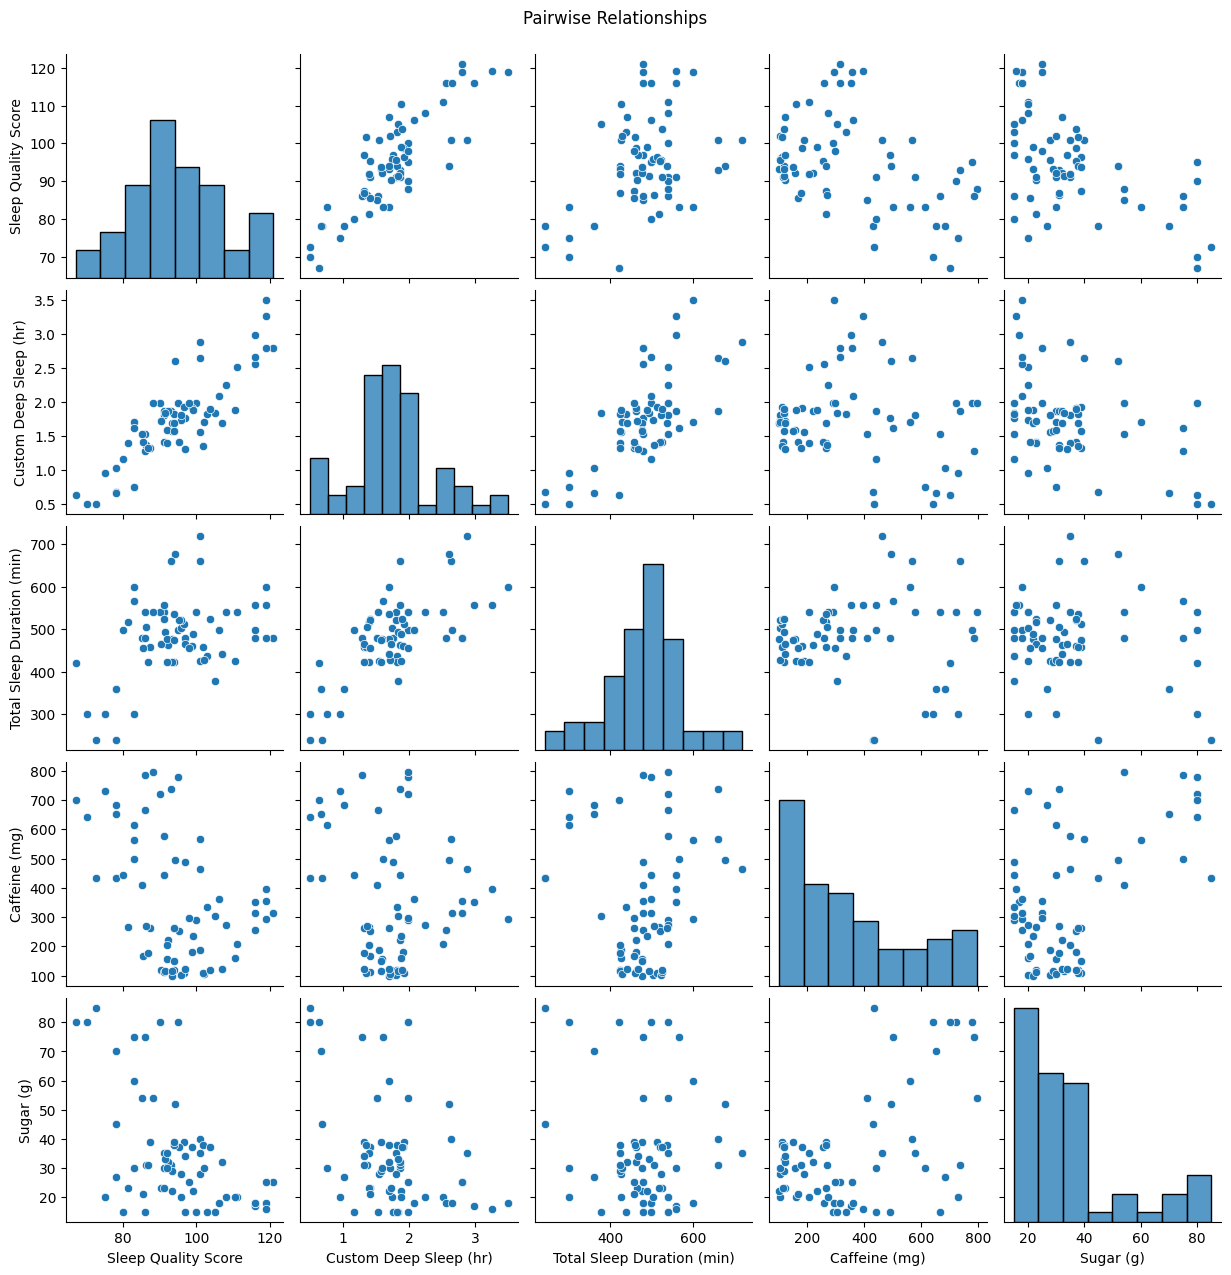

Linear Regression:
MAE: 7.663710935698224e-13
R²: 1.0

Random Forest:
MAE: 2.7435765532402314
R²: 0.9414728676078875


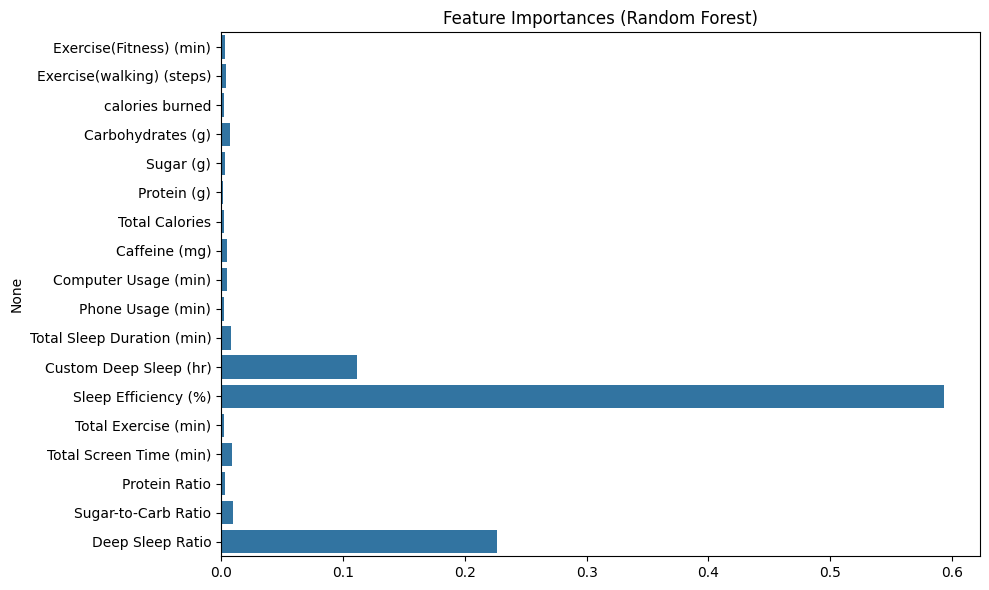

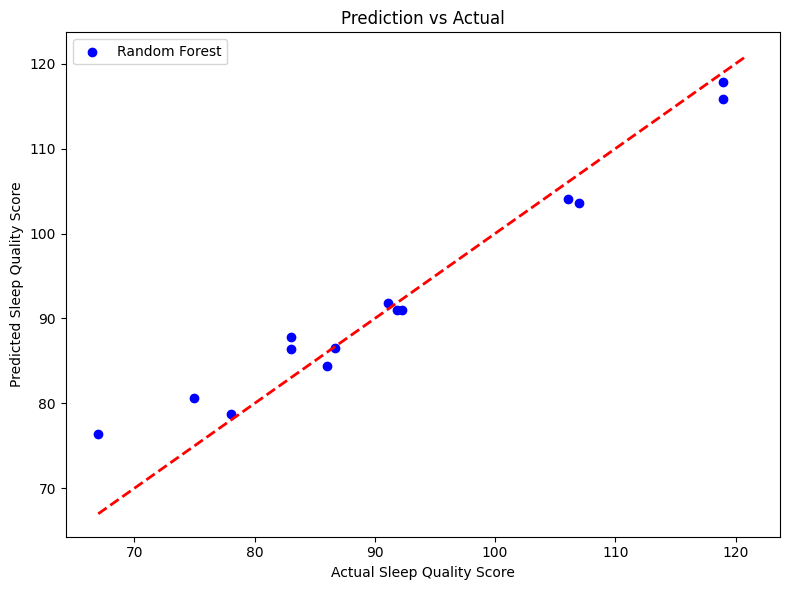

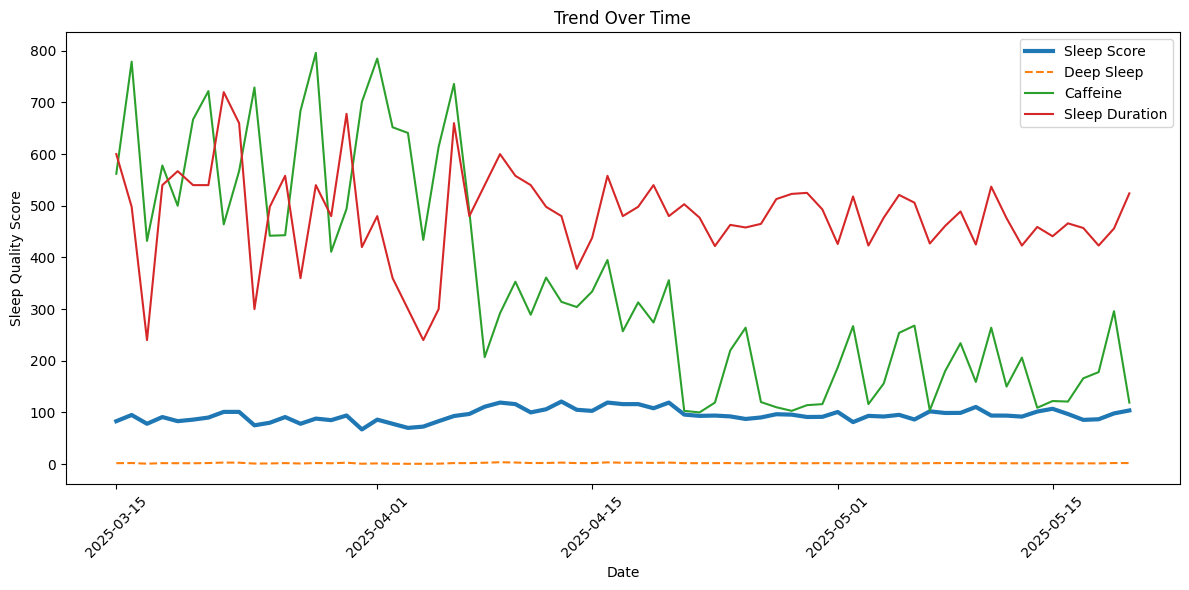

In [17]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# Korelasyon Matrisi
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df, vars=['Sleep Quality Score', 'Custom Deep Sleep (hr)',
                       'Total Sleep Duration (min)', 'Caffeine (mg)', 'Sugar (g)'])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Feature set ve hedef
exclude_cols = ["Date", "Sleep Onset Time", "Sleep Quality Score"]
X = df.drop(columns=exclude_cols)
y = df["Sleep Quality Score"]

# Eğitim - test ayırımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeller
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Tahmin
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)

# Performans
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("R²:", r2_score(y_test, lr_preds))

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("R²:", r2_score(y_test, rf_preds))

# Özellik Önemleri
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# Gerçek vs Tahmin
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_preds, color='blue', label="Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Sleep Quality Score")
plt.ylabel("Predicted Sleep Quality Score")
plt.title("Prediction vs Actual")
plt.legend()
plt.tight_layout()
plt.show()

# Trend Analizi
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Sleep Quality Score', data=df, label='Sleep Score', linewidth=3)
sns.lineplot(x='Date', y='Custom Deep Sleep (hr)', data=df, label='Deep Sleep', linestyle='--')
sns.lineplot(x='Date', y='Caffeine (mg)', data=df, label='Caffeine')
sns.lineplot(x='Date', y='Total Sleep Duration (min)', data=df, label='Sleep Duration')
plt.title("Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


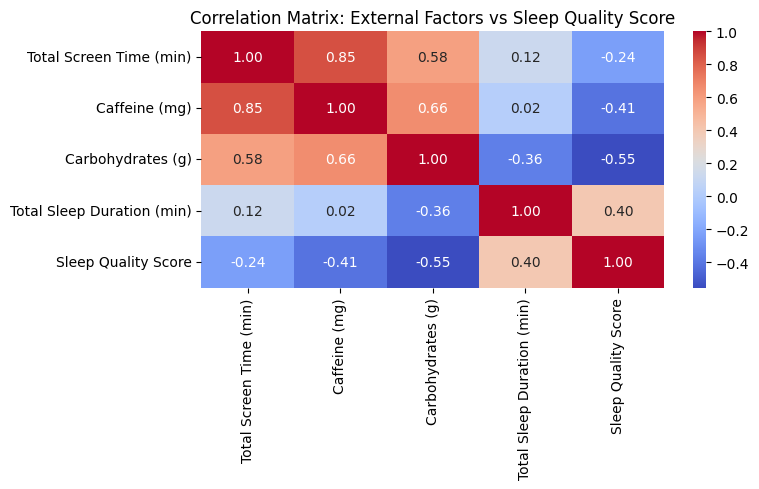

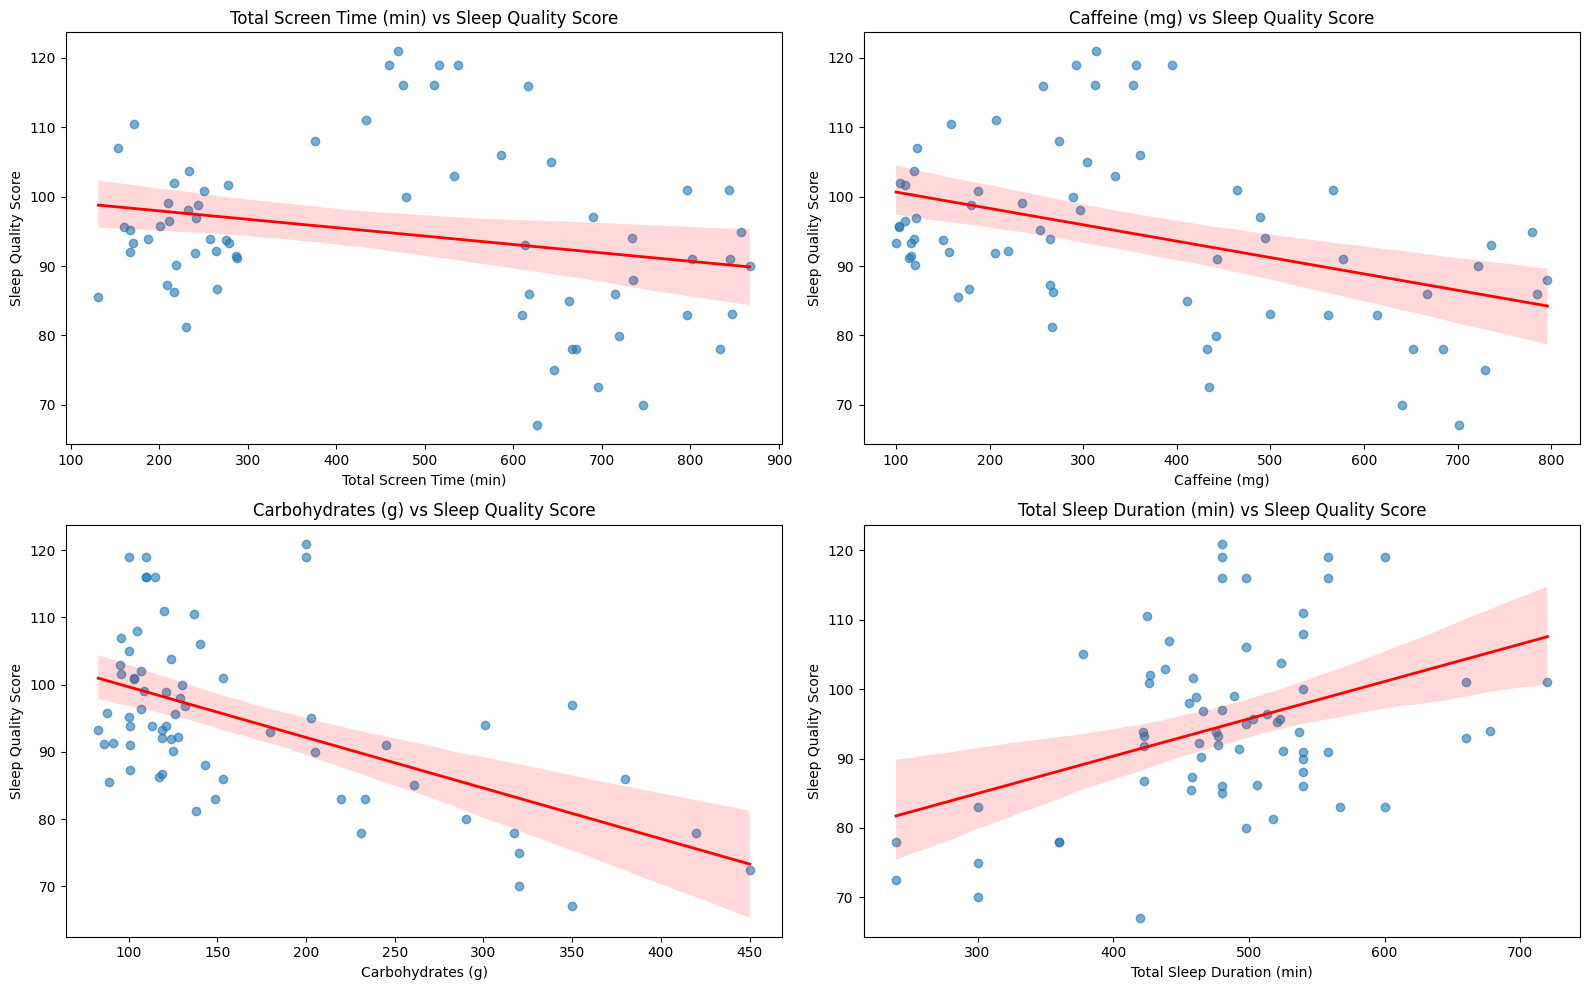

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dış etkenleri ve hedef değişkeni seç
cols = ['Total Screen Time (min)', 'Caffeine (mg)', 'Carbohydrates (g)', 'Total Sleep Duration (min)', 'Sleep Quality Score']

# Korelasyon matrisi ve ısı haritası
plt.figure(figsize=(8, 5))
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: External Factors vs Sleep Quality Score")
plt.tight_layout()
plt.show()

# Dağılım ve regresyon çizgileri ile scatter plot'lar
plt.figure(figsize=(16, 10))
for idx, feature in enumerate(cols[:-1]):
    plt.subplot(2, 2, idx + 1)
    sns.regplot(data=df, x=feature, y='Sleep Quality Score', scatter_kws={'alpha':0.6}, line_kws={"color": "red", "lw": 2})
    plt.title(f"{feature} vs Sleep Quality Score")
    plt.xlabel(feature)
    plt.ylabel("Sleep Quality Score")
plt.tight_layout()
plt.show()


In [19]:
df["Protein Ratio"] = df["Protein (g)"] / df["Total Calories"]
df["Deep Sleep Ratio"] = df["Custom Deep Sleep (hr)"] / (df["Total Sleep Duration (min)"] / 60)
df["Total Screen Time (min)"] = df["Computer Usage (min)"] + df["Phone Usage (min)"]
df["Screen Load Ratio"] = df["Total Screen Time (min)"] / df["Total Sleep Duration (min)"]


In [20]:
y = df["Sleep Quality Score"]
exclude_cols = ["Date", "Sleep Onset Time", "Sleep Quality Score"]
X = df.drop(columns=exclude_cols)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Modelleri tanımla
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Eğitim
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Tahmin
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Linear Regression değerlendirme
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("R² Score:", r2_score(y_test, lr_preds))

# Random Forest değerlendirme
print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))




Linear Regression:
MAE: 7.430246893948476e-13
R² Score: 1.0

Random Forest:
MAE: 2.805513159406599
R² Score: 0.9371309865766827


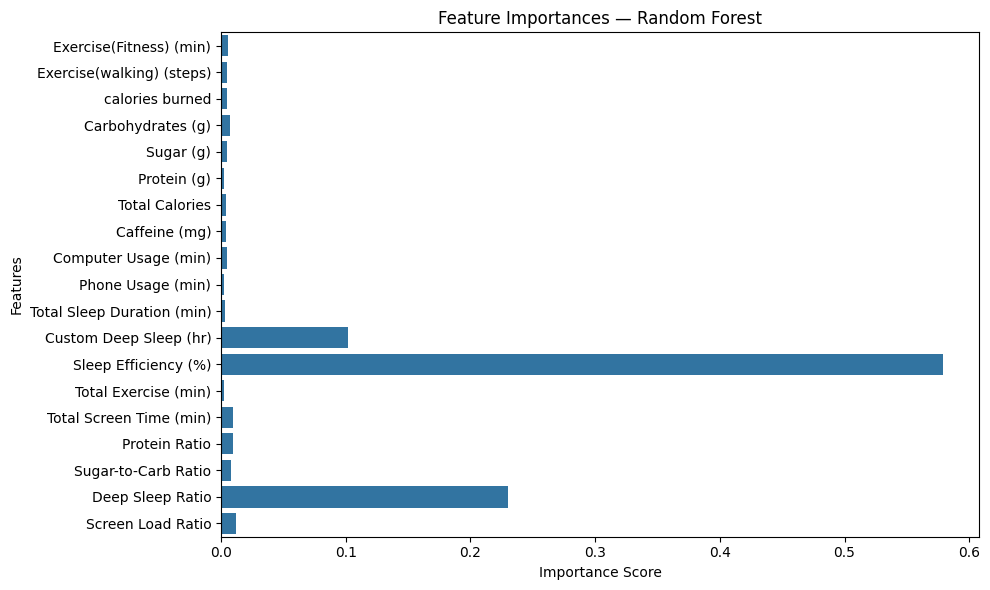

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances — Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [23]:
df["Screen Load Index"] = df["Total Screen Time (min)"] / df["Total Sleep Duration (min)"]
df["Caffeine-to-Exercise Ratio"] = df["Caffeine (mg)"] / (df["Total Exercise (min)"] + 1)
df["Sleep Load Score"] = (
    df["Total Calories"] * 0.3 +
    df["Caffeine (mg)"] * 0.3 +
    df["Total Screen Time (min)"] * 0.2 -
    df["Total Sleep Duration (min)"] * 0.2
)
# Yeni özellikleri ekledikten sonra tekrar X ve y’yi tanımla
exclude_cols = ["Date", "Sleep Onset Time", "Sleep Quality Score"]
X = df.drop(columns=exclude_cols)
y = df["Sleep Quality Score"]

# Eğitim-Test bölmesi yeniden
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Modelleri tekrar eğit
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Yeni tahminler
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Yeni performans skorları
print("Linear Regression after feature engineering:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("R² Score:", r2_score(y_test, lr_preds))

print("\nRandom Forest after feature engineering:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))


Linear Regression after feature engineering:
MAE: 5.867052875276256e-13
R² Score: 1.0

Random Forest after feature engineering:
MAE: 2.729275106734318
R² Score: 0.9347081159169863


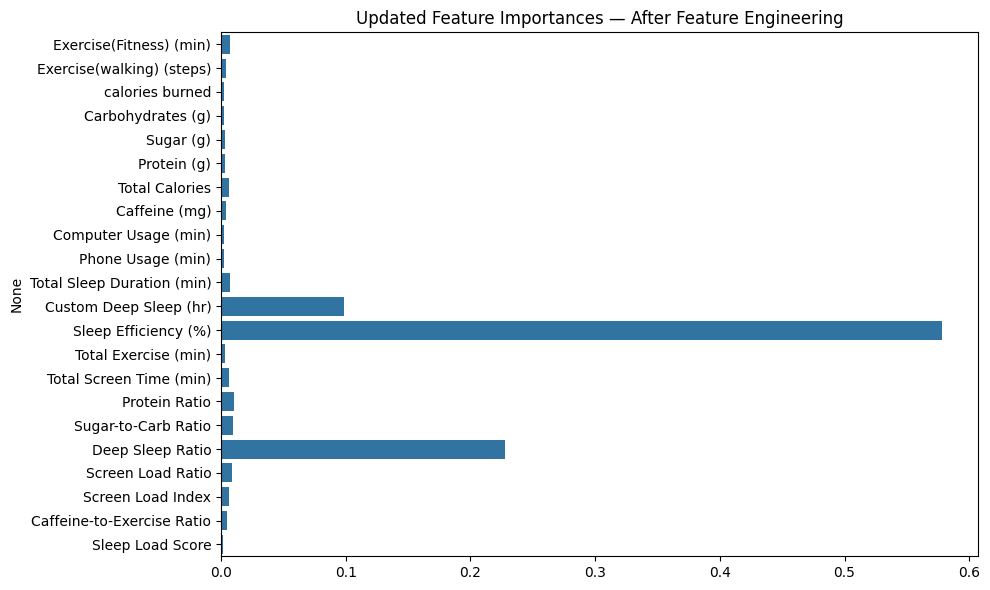

In [24]:
# Yeni feature importances
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Updated Feature Importances — After Feature Engineering")
plt.tight_layout()
plt.show()


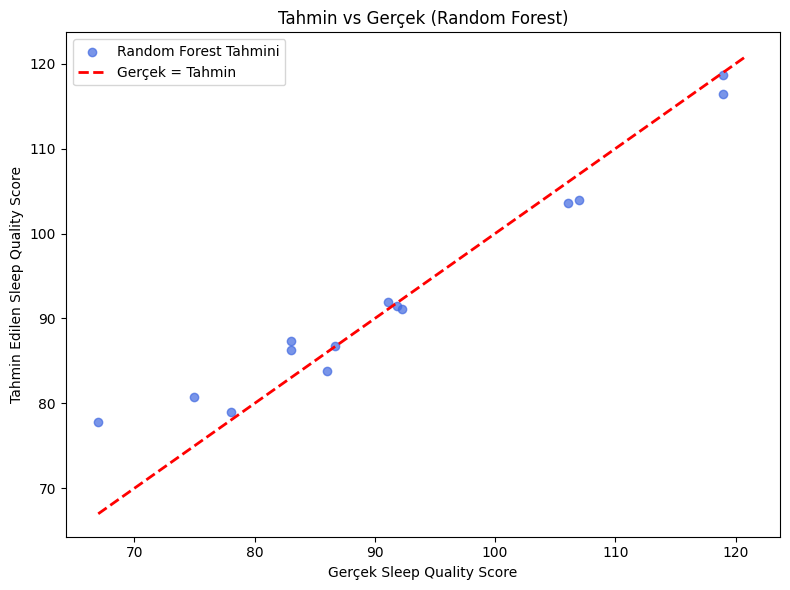

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_preds, color='royalblue', label="Random Forest Tahmini", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Gerçek = Tahmin")

plt.xlabel("Gerçek Sleep Quality Score")
plt.ylabel("Tahmin Edilen Sleep Quality Score")
plt.title("Tahmin vs Gerçek (Random Forest)")
plt.legend()
plt.tight_layout()
plt.show()


Cross-Validation R² Scores: [0.89674741 0.9138828  0.81898418 0.82648415 0.94150758]
Mean R²: 0.8795212235033129


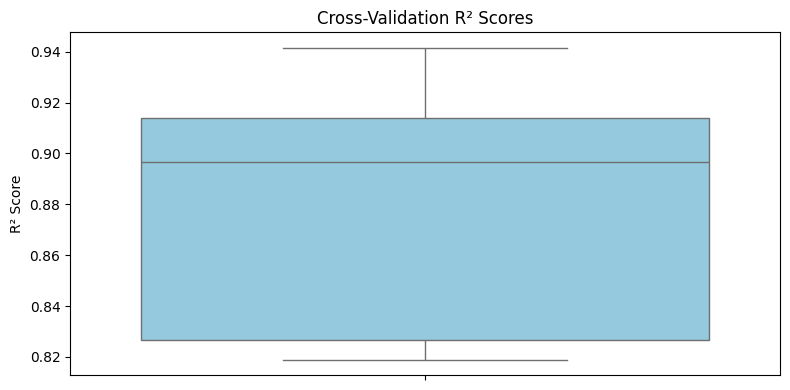

In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring="r2")

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))
plt.figure(figsize=(8, 4))
sns.boxplot(data=cv_scores, color="skyblue")
plt.title("Cross-Validation R² Scores")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()
